In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FOLDER_PATH = Path().resolve().parent / "statistics"
AGENT_NAME = "search"

In [16]:
def calculate_statistics(df):
    """
    Given a DataFrame, calculate the base statistics for the represented data.
    """
    return {
        "success_rate": df[df["Result"]==0]["Result"].size / df["Result"].size,
        "fail_rate": df[df["Result"]==1]["Result"].size / df["Result"].size,
        "unknown_rate": df[df["Result"]==2]["Result"].size / df["Result"].size,
        "average_time": df["Time"].mean(),
        "average_time_success": df[df["Result"]==0]["Time"].mean(),
        "average_time_fail": df[df["Result"]==1]["Time"].mean(),
        "average_time_unknown": df[df["Result"]==2]["Time"].mean(),
        "max_time": df["Time"][df["Result"]==0].max(),
        "min_time": df["Time"][df["Result"]==0].min(),
        "average_steps": df["Num of steps"].mean(),
        "average_steps_success": df[df["Result"]==0]["Num of steps"].mean(),
        "average_steps_fail": df[df["Result"]==1]["Num of steps"].mean(),
        "average_steps_unknown": df[df["Result"]==2]["Num of steps"].mean(),
        "max_steps": df["Num of steps"][df["Result"]==0].max(),
        "min_steps": df["Num of steps"][df["Result"]==0].min(),
    }

In [17]:
import matplotlib.pyplot as plt 
df = pd.read_csv(FOLDER_PATH / AGENT_NAME / "logs_SearchAgent_easy.txt")
for file in (FOLDER_PATH / AGENT_NAME).iterdir():
    if file.is_file() and file.name.startswith("logs_"):
        df = pd.read_csv(file)
        statistics = calculate_statistics(df)
        print(f"Statistics for {file.name}:")
        [print(f"{key}: {value}") for key, value in statistics.items()]


Statistics for logs_SearchAgent_hard.txt:
success_rate: 0.182
fail_rate: 0.818
unknown_rate: 0.0
average_time: 0.600705447435379
average_time_success: 1.4529078163943447
average_time_fail: 0.4110956294029441
average_time_unknown: nan
max_time: 2.6705541610717773
min_time: 0.8406200408935547
average_steps: 70.506
average_steps_success: 140.07692307692307
average_steps_fail: 55.02689486552567
average_steps_unknown: nan
max_steps: 340
min_steps: 80
Statistics for logs_SearchAgent_easy.txt:
success_rate: 0.794
fail_rate: 0.206
unknown_rate: 0.0
average_time: 0.020264591932296704
average_time_success: 0.024344771574966808
average_time_fail: 0.004538074280451754
average_time_unknown: nan
max_time: 0.1820960044860839
min_time: 0.0068416595458984
average_steps: 23.976
average_steps_success: 28.727959697733
average_steps_fail: 5.660194174757281
average_steps_unknown: nan
max_steps: 49
min_steps: 13
Statistics for logs_SearchAgent_medium.txt:
success_rate: 0.454
fail_rate: 0.546
unknown_rate: 0.

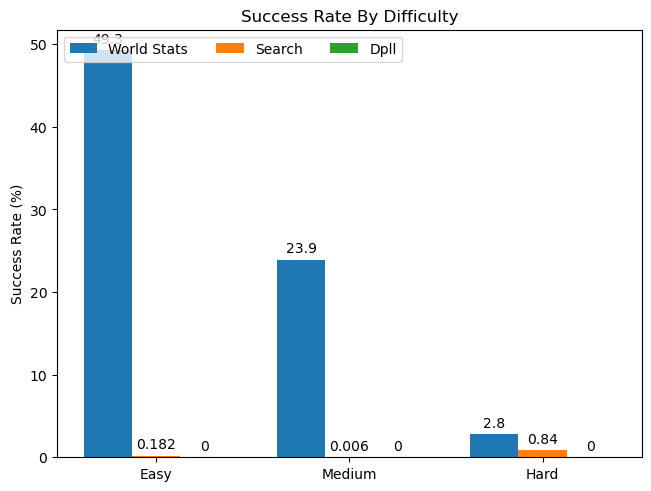

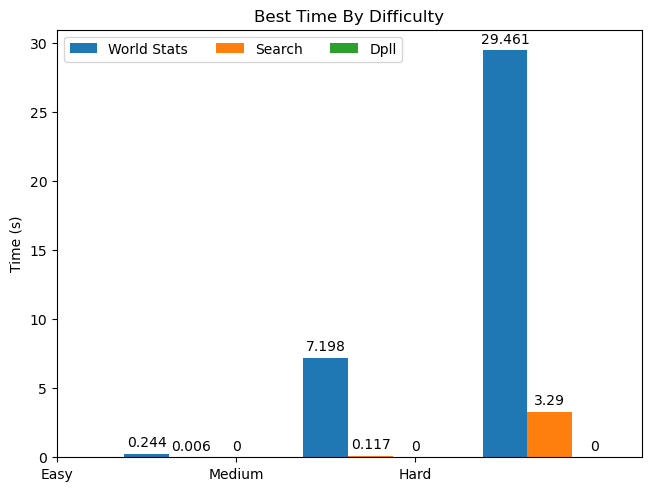

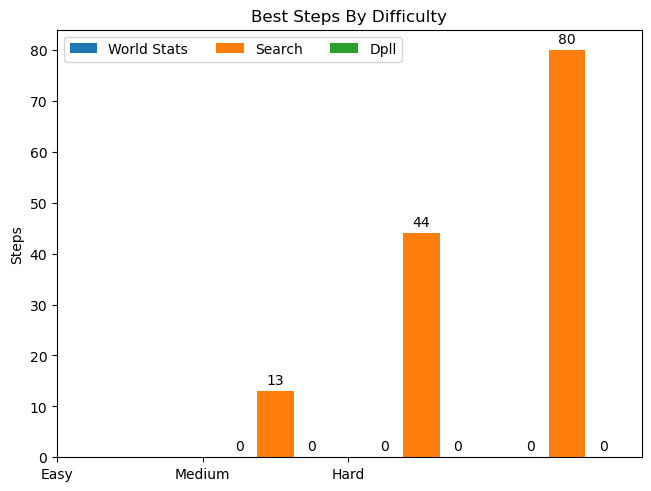

In [19]:
import matplotlib.pyplot as plt
import numpy as np
difficulties = ("Easy", "Medium", "Hard")
data = [{
    'World Stats': (49.3,23.9,2.8),
    'Search': (0.182, 0.006, 0.840),
    'Dpll': (0,0,0),
},
{
    'World Stats': (0.244,7.198,29.461),
    'Search': (0.006, 0.117, 3.29),
    'Dpll': (0,0,0),
},
{
    'World Stats': (0.0,0.0,0.0),
    'Search': (13, 44, 80),
    'Dpll': (0,0,0),
}]
titles = [
    "Success Rate By Difficulty",
    "Best Time By Difficulty",
    "Best Steps By Difficulty",
]
y_labels = [
    "Success Rate (%)",
    "Time (s)",
    "Steps",
]

x = np.arange(len(difficulties))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
for title,y_label,data in zip(titles,y_labels,data):
    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, difficulties)
    ax.legend(loc='upper left', ncols=3)

    plt.show()